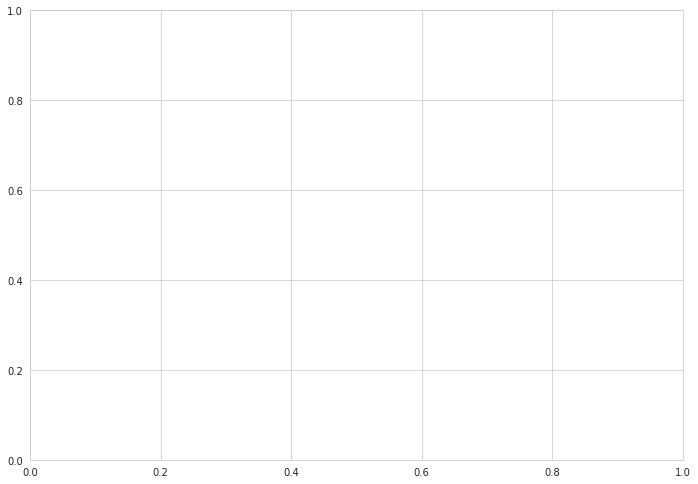

In [91]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
%matplotlib inline

#COSE DEL DATAFRAME
df = pd.read_csv("../DatasetClientClustering.csv", 
                 engine='c', 
                 sep=',', 
                 encoding='latin-1')
df = df.drop(df.columns[list(np.arange(8))], axis=1)
df = df.drop(columns=["ClientID"])


current_investment = ["PortfolioRisk", "PortfolioHorizon", "AuM", "BondInvestments", "EquityInvestments",
                     "MoneyMarketInvestments", "OtherInvestments", "Cash"]
person_var = ["RiskPropension", "ClientInvestmentHorizon", "ClientKnowledgeExperience", "ClientPotentialIndex",
             "IncomeHighLow", "Sex", "Age", "IncomeNeed", "LongTermCareNeed", "ProtectionNeed",
             "InheritanceIndex", "PanicMood", "ClientDateStart", "NoTrustInBanks"]

(array([  6.,  27.,  74., 159., 293., 420., 407., 322., 155.,  86.,  49.,
         66., 137., 216., 271., 290., 265., 130.,  64.,  40.,  58., 128.,
        227., 272., 323., 244., 167.,  68.,  28.,   8.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <a list of 30 Patch objects>)

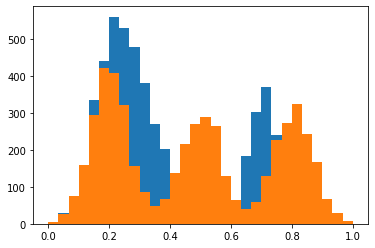

In [68]:
from sklearn import cluster as cster
plt.hist(df["ProtectionNeed"], bins = 30)
plt.hist(df["LongTermCareNeed"], bins = 30)

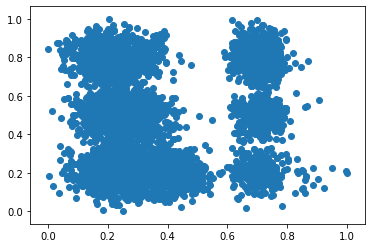

In [69]:
plt.scatter(x = df["ProtectionNeed"], y = df["LongTermCareNeed"])

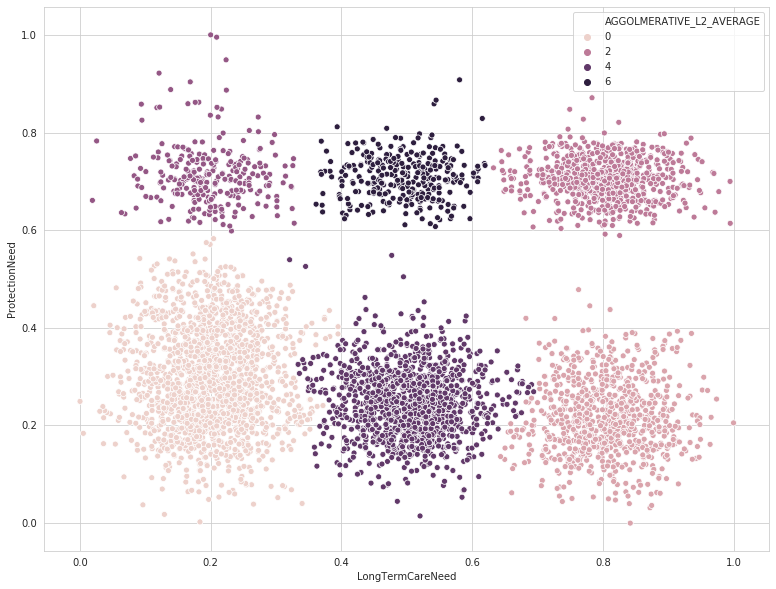

In [94]:
df_bi = df[["ProtectionNeed", "LongTermCareNeed"]] 
dbscan = cster.DBSCAN()
bi_cluster = dbscan.fit_predict(df_bi)
df_bi["DBSCAN_DEFAULT"] = bi_cluster
#very bad

kmeans = cster.AgglomerativeClustering(n_clusters = 6, affinity = "l2", linkage = "average")
bi_cluster = kmeans.fit_predict(X = df_bi)
df_bi["AGGOLMERATIVE_L2_AVERAGE"] = bi_cluster

#SETTO I COSI DI SEABORN
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig = fig.set_size_inches(13s, 10)
sns.scatterplot(y = "ProtectionNeed", 
                x = "LongTermCareNeed", 
                hue = "AGGOLMERATIVE_L2_AVERAGE",
                data = df_bi)
#carino chico

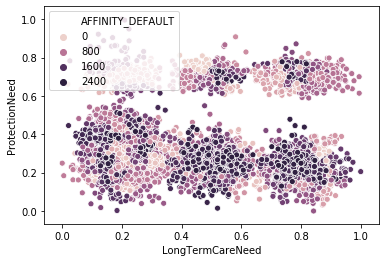

In [71]:
#SUCKS
affprog = cster.AffinityPropagation()
bi_cluster = affprog.fit_predict(X = df_bi[["LongTermCareNeed", "ProtectionNeed"]])
df_bi["AFFINITY_DEFAULT"] = bi_cluster

sns.scatterplot(y = "ProtectionNeed", 
                x = "LongTermCareNeed", 
                hue = "AFFINITY_DEFAULT",
                data = df_bi)

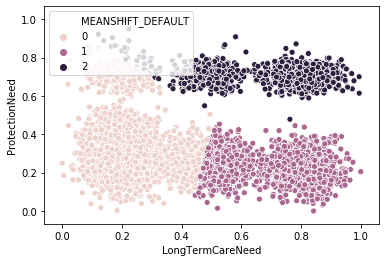

In [74]:
#SUCKS
meanShift = cster.MeanShift()
bi_cluster = meanShift.fit_predict(X = df_bi[["LongTermCareNeed", "ProtectionNeed"]])
df_bi["MEANSHIFT_DEFAULT"] = bi_cluster

sns.scatterplot(y = "ProtectionNeed", 
                x = "LongTermCareNeed", 
                hue = "MEANSHIFT_DEFAULT",
                data = df_bi)